# Wasserstein barycenterによる画像補間

ユークリッド距離の代わりにWasserstein距離により定義される重心によって複数の画像間のぼやけることのない中間画像を生成する。
重心を計算する際の重みを調節することでどの参考画像により近づけるかを調節できる。

Wasserstein距離の最適化はエントロピー制約付きの最適化問題をsinkhornアルゴリズムにより解ける。
ライブラリはPython optimal transportを用いた

In [66]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import ot
def im2mat(I):
    return I.reshape((I.shape[0] * I.shape[1], I.shape[2]))

def mat2im(X, shape):
    return X.reshape(shape)

image1 = plt.imread('pic1.jpg').astype(np.float64) / 256
image2 = plt.imread('pic2.jpg').astype(np.float64) / 256

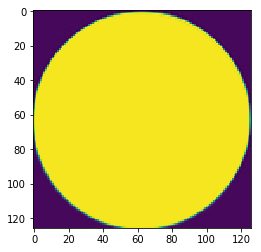

In [67]:
plt.imshow(image1)

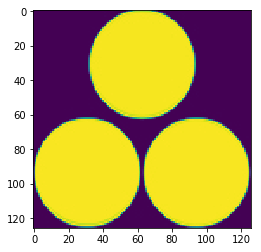

In [68]:
plt.imshow(image2)

中間画像は以下のWasserstein距離の最適化問題の解として与えられる

$\mathrm{interimg}=\mathrm{arg}\min_{\mathrm{img}} wW(\mathrm{img},\mathrm{img}1)+(1-w)W(\mathrm{img},\mathrm{img}2)$

In [58]:
weights=np.linspace(0,1,11)
print(weights)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


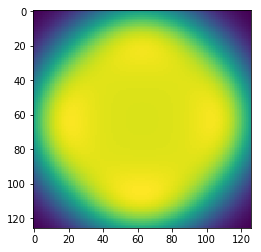

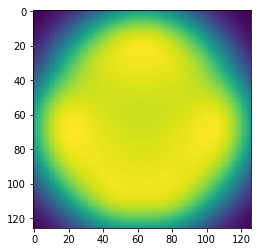

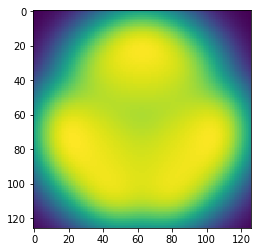

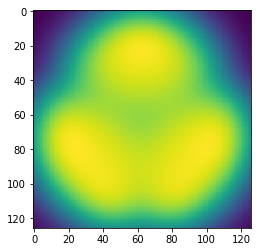

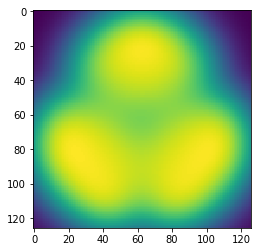

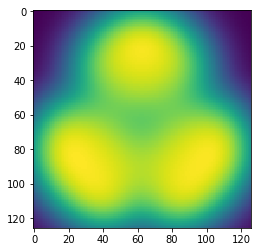

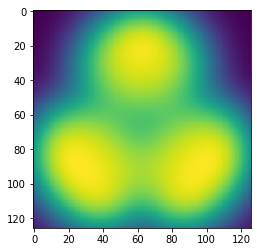

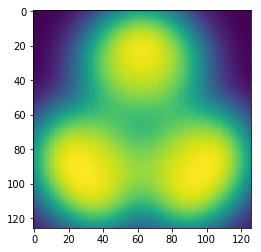

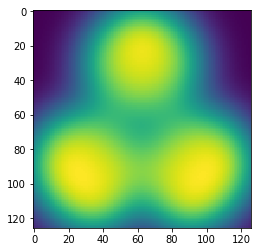

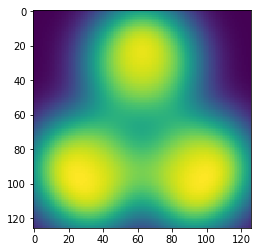

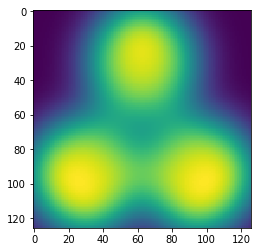

In [84]:
image_merge=np.array([image1,image2])
for w in weights:
    plt.imshow(ot.bregman.convolutional_barycenter2d(image_merge,0.0196,[1-w,w]))
    plt.show()